**Zillow Data Dictionary** [(Zillow API Documentation)](https://www.quandl.com/data/ZILLOW-Zillow-Real-Estate-Research/documentation)

| Indicator Code | Description |
| --- | --- |
| MLPAH | Median Listing Price - All Homes |
| MLPCC | Median Listing Price - Condo/Co-op |
| MLPDT | Median Listing Price - Duplex/Triplex |
| MLP5B | Median Listing Price - Five Or More Bedrooms |
| MLP4B | Median Listing Price - Four Bedrooms |
| MLP1B | Median Listing Price - One Bedroom |
| MLPSF | Median Listing Price - Single-Family Residence |
| MLP3B | Median Listing Price - Three Bedrooms |
| MLP2B | Median Listing Price - Two Bedrooms |

In [1]:
import pandas as pd
import json
import requests 
import zipcodes
import http.client 
import matplotlib.pyplot as plt
from collections import defaultdict
import quandl 

In [2]:
#ENTER ZIP CODE AND DATE TO GET PROPERTY INFORMATION & TIME SERIES  

while True: 
    zipinput = input("Enter a zip code value ") # Input the desired zipcode to search
    if zipcodes.is_real(zipinput):
        break
    else:
        print("Invalid zip code...re-enter zip code")

Enter a zip code value 78758


In [3]:
#PULL SALES DATA FROM ZILLOW API BY ZIP CODE
with open('../../misc/api_keys/quandl.txt') as f:
    q_key = f.read().strip()

all_time_series = quandl.get("ZILLOW/Z"+zipinput+"_MLPAH", authtoken=q_key)
sf_time_series = quandl.get("ZILLOW/Z"+zipinput+"_MLPSF", authtoken=q_key)

Combined_time_series = pd.concat([all_time_series,sf_time_series],
                                 keys=['All Homes Median Price','Single Family Median Price'],
                                 axis=1)

Combined_time_series.reset_index(inplace=True)

In [4]:
#TIME SERIES FOR HOME PRICES VARIES BASED ON INFORMATION AVAIBILITY FOR ZIPCODE & HOUSING TYPE
Combined_time_series.tail(15)

,Date,All Homes Median Price,Single Family Median Price
,,Value,Value
35,2018-10-31,287000.0,299999.0
36,2018-11-30,289450.0,299999.0
37,2018-12-31,289000.0,299250.0
38,2019-01-31,299999.5,310000.0
39,2019-02-28,300000.0,315000.0
40,2019-03-31,307500.0,320000.0
41,2019-04-30,329000.0,335000.0
42,2019-05-31,325250.0,333497.5
43,2019-06-30,315000.0,325500.0


In [5]:
#CONVERT DATE TO YEAR-MONTH
chartdates = Combined_time_series['Date'].astype(int) 

chartdates = Combined_time_series['Date'].apply(lambda x:  str(x.year)+ '-' +str(x.month)) #

print(chartdates.head())
print()

#NUMBER OF MONTHS DATA
print(f"This dataset includes {len(chartdates)} months of Zillow sales data.")

0    2015-11
1    2015-12
2     2016-1
3     2016-2
4     2016-3
Name: Date, dtype: object

This dataset includes 50 months of Zillow sales data.


In [6]:
#FUNCTION CREATES AND SAVES A SALES DATA LINE GRAPH
def plot_quandl_series(col_name):
    
    x = chartdates
    y = Combined_time_series[col_name]
    fig,ax=plt.subplots(figsize=(12,10))

    ax.plot(x, y)
    plt.title(col_name+' - '+zipinput, fontsize=20)

    ax.set_xticks(x[::3])

    ax.set_xticklabels(x[::3],rotation=90)


    plt.xlabel("Period", fontsize=15)
    plt.ylabel("Median price", fontsize=15)
    plt.yticks(fontsize=15)

    y_labels = ax.get_yticks()
    ax.set_yticklabels(list(map(lambda x: '${:0.1f}'.format(x), y_labels)))
    plt.savefig(f'./images/zillow_trends_graph_{zipinput}.png')
    plt.show();

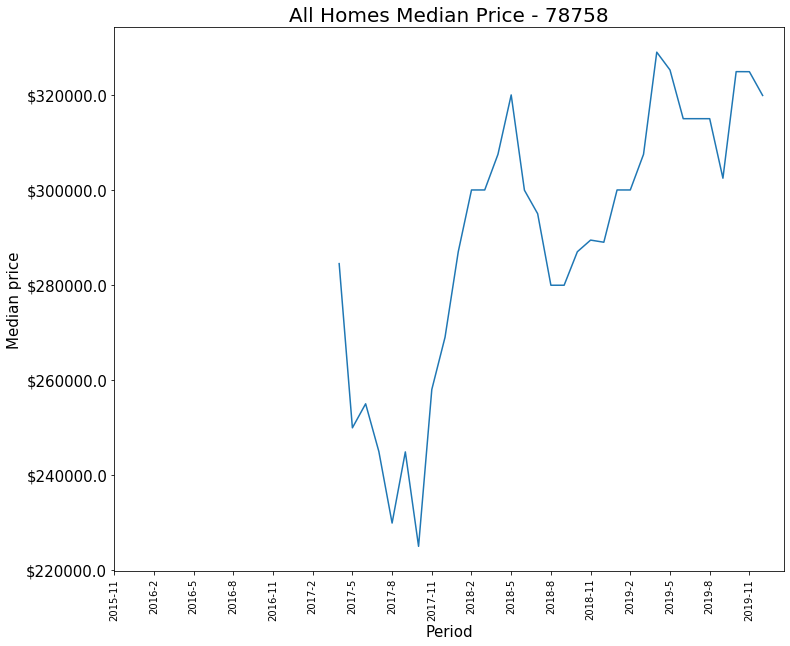

In [7]:
plot_quandl_series(col_name='All Homes Median Price')

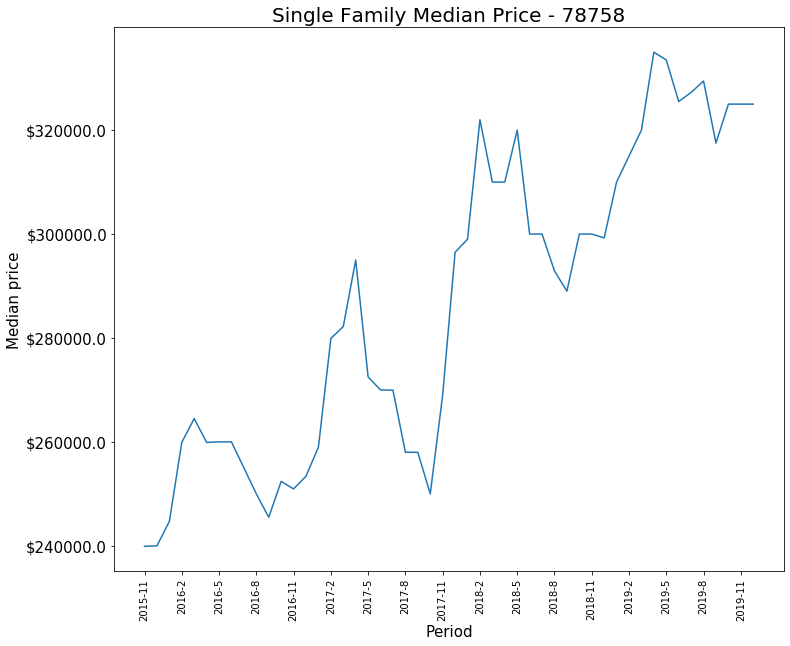

In [8]:
plot_quandl_series(col_name='Single Family Median Price')